In [50]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [7]:
block_size =3

def build_dataset(words):
    X,Y = [],[]

    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [37]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(214783647)
C = torch.randn((vocab_size, n_embd), generator=g)
W1 = torch.randn((n_embd * block_size,n_hidden), generator=g)
b1 = torch.randn(n_hidden, generator=g)
W2 = torch.randn((n_hidden,vocab_size), generator=g) * 0.01 # make it smaller, we don't want to set weights to exactly zero
b2 = torch.randn(vocab_size, generator=g) * 0 # init to zero

parameters = [C,W1,b1,W2,b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True


11897


In [38]:
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):

    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix]

    emb = C[Xb]
    embcat = emb.view(emb.shape[0],-1)
    hpract = embcat @ W1 + b1
    h = torch.tanh(hpract)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Yb)

    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    if i % 10000 == 0:
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())
    break

# back propigation is moving backwards throught the network.
# if the values are at the extremes then they will get squash in backpropigation, keeping the gradiant from passing through (tanh)



      0/ 200000: 3.3216
  10000/ 200000: 2.2620
  20000/ 200000: 2.5158
  30000/ 200000: 2.4351
  40000/ 200000: 2.2656
  50000/ 200000: 2.3077
  60000/ 200000: 2.1906
  70000/ 200000: 2.0747
  80000/ 200000: 1.9734
  90000/ 200000: 2.1727
 100000/ 200000: 2.0372
 110000/ 200000: 2.4157
 120000/ 200000: 2.3580
 130000/ 200000: 2.4212
 140000/ 200000: 1.9871
 150000/ 200000: 1.9270
 160000/ 200000: 2.1045
 170000/ 200000: 1.9470
 180000/ 200000: 1.9443
 190000/ 200000: 2.5806


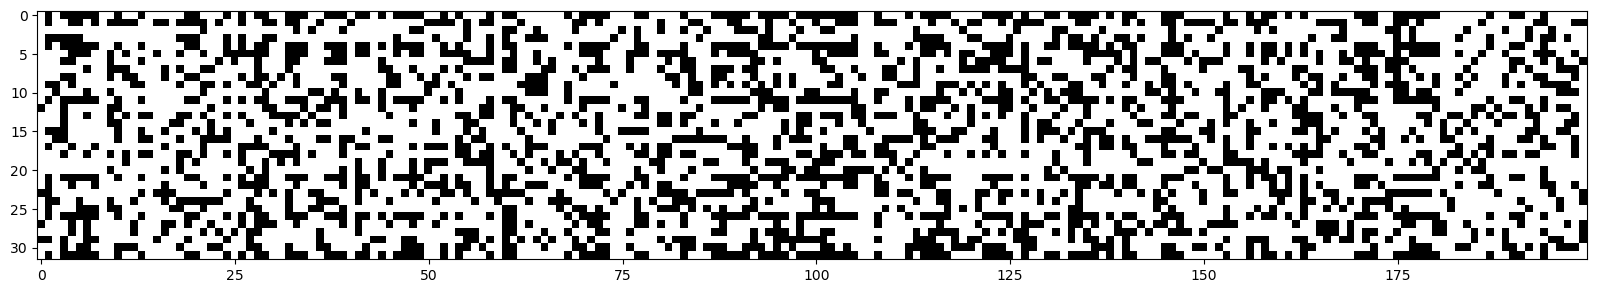

In [46]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs() > 0.99, cmap="grey", interpolation="nearest")
# > 0.99 is considered a flat region of tanh
# if an entire column is white, we have a dead nuron. it learns nothing
# it appears that all are learning. no pure white

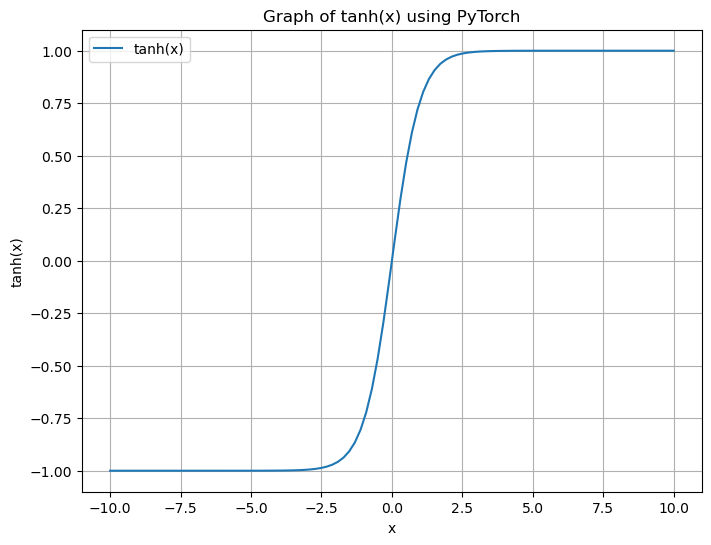

In [48]:
# Generate a range of values from -10 to 10 using PyTorch
x = torch.linspace(-10, 10, 100)
# Apply the tanh function using PyTorch
y = torch.tanh(x)

plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y.numpy(), label='tanh(x)')  # Converting tensors to numpy arrays for plotting
plt.title('Graph of tanh(x) using PyTorch')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()
plt.show()


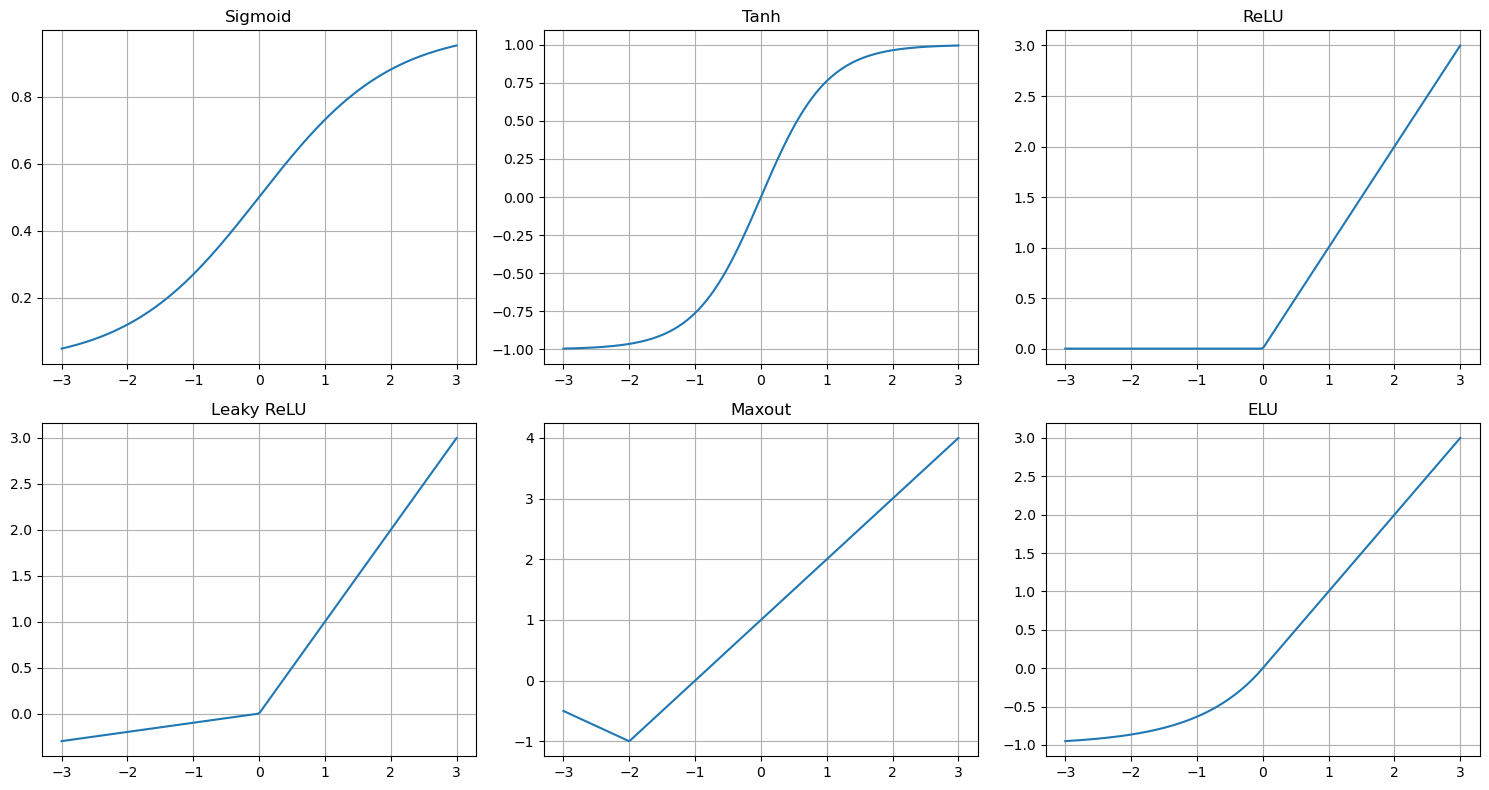

In [51]:


# Define the range of x values
x = np.linspace(-3, 3, 200)

# Activation Functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def maxout_example(x):
    # For demonstration, we'll just use two linear functions.
    w1, b1 = 1.0, 1.0  # Coefficients for the first linear piece
    w2, b2 = -0.5, -2.0  # Coefficients for the second linear piece
    return np.maximum(w1 * x + b1, w2 * x + b2)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

# Define the plot layout
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Define a dictionary of functions to plot
activation_functions = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu,
    'Maxout': maxout_example,
    'ELU': elu,
}

# Plot the functions
for ax, (name, function) in zip(axes.flatten(), activation_functions.items()):
    y = function(x)
    ax.plot(x, y)
    ax.set_title(name)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# if a nueron with a relu non-linearity outputs a negative, it will never activate therefore it will never learn
# sometimes this can happen during training. Akin to brain damage
# others that have flat parts can have this happen


Sure, here are the mathematical representations of each activation function in Markdown format:

1. **Sigmoid:**
```markdown
\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]
```

2. **Tanh:**
```markdown
\[
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\]
```

3. **ReLU (Rectified Linear Unit):**
```markdown
\[
\text{ReLU}(x) = \max(0, x)
\]
```

4. **Leaky ReLU:**
```markdown
\[
\text{Leaky ReLU}(x) = \begin{cases}
x & \text{if } x > 0, \\
0.01x & \text{otherwise}.
\end{cases}
\]
```

5. **Maxout (for the example provided, using two linear pieces):**
```markdown
\[
\text{Maxout}(x) = \max(w_1 x + b_1, w_2 x + b_2)
\]
```
(Note: `w_1`, `w_2`, `b_1`, and `b_2` are parameters that would be learned during training in a neural network.)

6. **ELU (Exponential Linear Unit):**
```markdown
\[
\text{ELU}(x) = \begin{cases}
x & \text{if } x \geq 0, \\
\alpha(e^{x} - 1) & \text{otherwise}.
\end{cases}
\]
```
(Note: `\alpha` is a hyperparameter that defines the value to which an ELU saturates for negative net inputs.)

You can use these representations in a Markdown cell to render the equations for the activation functions.

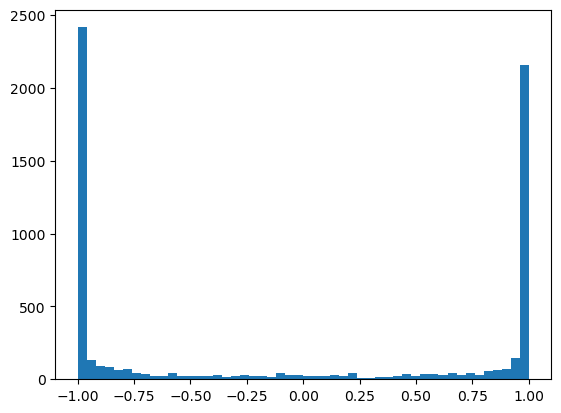

In [44]:
plt.hist(h.view(-1).tolist(),50);
# it's very active, most values are 1 or -1

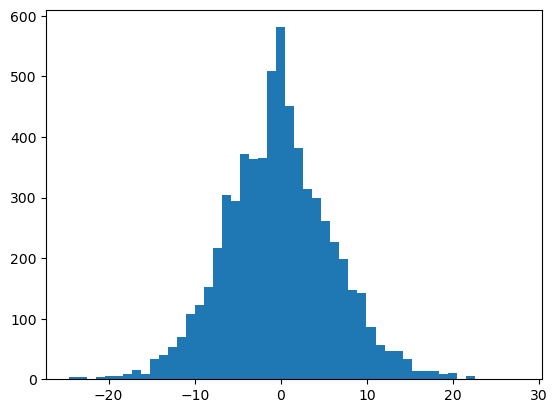

In [45]:
plt.hist(hpract.view(-1).tolist(),50);
# pre activations are very board, so the "squash" from tanh ends but having extremes
# these extremes lead to less learning so we want to fix this

In [42]:
# initial loss should be:
-torch.tensor(1/27.0).log()
# network is currently very confidently wrong.

tensor(3.2958)

In [26]:
# logits = torch.tensor([-3.0, 5.0, 0.0, 2.0])
# logits = torch.tensor([0.0, 0.0, 0.0, 0.0])
logits = torch.randn(4) * 10 # uniformly distributed
probs = torch.softmax(logits,dim=0)
loss = - probs[2].log()
logits, probs,loss
# this is a uniform distribution. All elements are equally likely
# if one of the logits happend to be much higher than the others then it would increaes the loss. 
# logits don't have to be zero, they just have to be equal to have a reasonable initial loss.

(tensor([ 13.7895, -14.5772,  -3.1877,   2.8867]),
 tensor([9.9998e-01, 4.7918e-13, 4.2356e-08, 1.8407e-05]),
 tensor(16.9772))

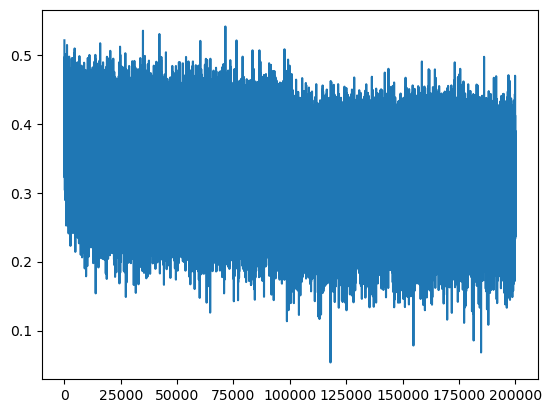

In [39]:
plt.plot(lossi)
# no longer a hockey stike becuase we took out the easy part. Now  we are spending more time actually optimizing

In [18]:
@torch.no_grad()
def split_loss(split):
    x,y = {
        "train": (Xtr,Ytr),
        "val":(Xdev,Ydev),
        "test": (Xte,Yte)
    }[split]
    emb = C[x]
    embcat = emb.view(emb.shape[0],-1)
    h = torch.tanh(embcat @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,y)
    print(split,loss.item())
split_loss("train")
split_loss("val")

train 2.124915838241577
val 2.187093734741211


In [20]:
g = torch.Generator().manual_seed(214783647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[i] for i in out))

rvelle.
zolyn.
yanj.
elis.
leyan.
harin.
maxtonam.
lamwie.
kycethalra.
derliel.
hazael.
revia.
jiayne.
marl.
dariam.
okf.
cramora.
loyani.
eighlilly.
lyn.
